GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | model    | ResNet     | 11.2 M
1 | features | Sequential | 157 K 
----------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.710    Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

100%|██████████| 100/100 [02:54<00:00,  1.74s/it]


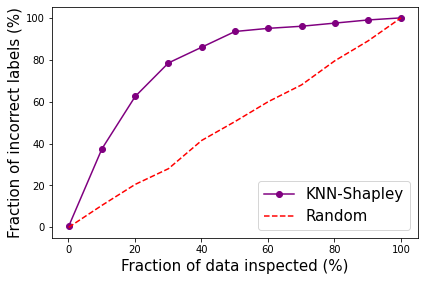

In [1]:
from models.resnet import ResNet
from shapley.dshap import DShap 
from utils.dataset import FashionMNISTDataModule
from shapley.knn_shapley import KNNShapley
from utils.plotter import LabelPlotter

dm = FashionMNISTDataModule() 
dm.setup() 

model = ResNet()

measure = KNNShapley()

dshap = DShap(dm, model, measure=measure, device="cuda")
scores = dshap.run() 

plotter = LabelPlotter(dm, ("KNN-Shapley", scores))
plotter.plot()